In [24]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Data Pelanggan 
data = {
    'Jumlah Pembelian': [150, 400, 750, 300, 600, 850, 200, 500],
    'Frekuensi Pelanggan': [3, 7, 11, 4, 8, 12, 5, 6]
}

df = pd.DataFrame(data)

# Menampilkan data untuk memastikan data terimpor dengan benar
print(df)

   Jumlah Pembelian  Frekuensi Pelanggan
0               150                    3
1               400                    7
2               750                   11
3               300                    4
4               600                    8
5               850                   12
6               200                    5
7               500                    6


In [69]:
# Definisi variabel untuk jumlah pembelian dan frekuensi pelanggan
jumlah_pembelian = np.arange(0, 1001, 1)  # 0 - 1000
frekuensi_pelanggan = np.arange(0, 13, 1)  # 0 - 12 bulan
diskon = np.arange(0, 51, 1)  # 0 - 50% diskon


In [67]:
# Definisi Fungsi Keanggotaan
# Fungsi keanggotaan untuk Jumlah Pembelian
jumlah_rendah = fuzz.trimf(jumlah_pembelian, [0, 0, 500])
jumlah_sedang = fuzz.trimf(jumlah_pembelian, [0, 500, 1000])
jumlah_tinggi = fuzz.trimf(jumlah_pembelian, [500, 1000, 1000])

# Fungsi keanggotaan untuk Frekuensi Pelanggan
frekuensi_jarang = fuzz.trimf(frekuensi_pelanggan, [0, 0, 6])
frekuensi_cukup = fuzz.trimf(frekuensi_pelanggan, [0, 6, 12])
frekuensi_sering = fuzz.trimf(frekuensi_pelanggan, [6, 12, 12])

# Fungsi keanggotaan untuk Diskon
diskon_kecil = fuzz.trimf(diskon, [0, 0, 20])
diskon_sedang = fuzz.trimf(diskon, [0, 20, 40])
diskon_besar = fuzz.trimf(diskon, [20, 40, 50])

In [68]:
# Inferensi dengan Aturan Fuzzy
for index, row in df.iterrows():
    jumlah_pembelian_data = row['Jumlah Pembelian']
    frekuensi_pelanggan_data = row['Frekuensi Pelanggan']

    # Menghitung derajat keanggotaan untuk jumlah pembelian
    jumlah_rendah_mesh = fuzz.interp_membership(jumlah_pembelian, jumlah_rendah, jumlah_pembelian_data)
    jumlah_sedang_mesh = fuzz.interp_membership(jumlah_pembelian, jumlah_sedang, jumlah_pembelian_data)
    jumlah_tinggi_mesh = fuzz.interp_membership(jumlah_pembelian, jumlah_tinggi, jumlah_pembelian_data)

    # Menghitung derajat keanggotaan untuk frekuensi pelanggan
    frekuensi_jarang_mesh = fuzz.interp_membership(frekuensi_pelanggan, frekuensi_jarang, frekuensi_pelanggan_data)
    frekuensi_cukup_mesh = fuzz.interp_membership(frekuensi_pelanggan, frekuensi_cukup, frekuensi_pelanggan_data)
    frekuensi_sering_mesh = fuzz.interp_membership(frekuensi_pelanggan, frekuensi_sering, frekuensi_pelanggan_data)

    # Aturan fuzzy
    rule1 = np.fmin(jumlah_tinggi_mesh, frekuensi_sering_mesh)  # Jika pembelian tinggi dan pelanggan sering
    rule2 = np.fmin(jumlah_sedang_mesh, frekuensi_cukup_mesh)  # Jika pembelian sedang dan pelanggan cukup
    rule3 = np.fmin(jumlah_rendah_mesh, frekuensi_jarang_mesh)  # Jika pembelian rendah dan pelanggan jarang

    # Menggabungkan hasil aturan
    aggregated = np.fmax(np.fmin(rule1, diskon_besar),
                         np.fmin(rule2, diskon_sedang),
                         np.fmin(rule3, diskon_kecil))

    # Mengecek apakah area agregat kosong
    if np.sum(aggregated) == 0:
        print(f"Data Pelanggan {index+1}: Tidak ada area keanggotaan yang valid untuk defuzzifikasi.")
    else:
        # Defuzzifikasi
        diskon_output = fuzz.defuzz(diskon, aggregated, 'centroid')

        print(f"Data Pelanggan {index+1}:")
        print(f"  Jumlah Pembelian: {jumlah_pembelian_data}")
        print(f"  Frekuensi Pelanggan: {frekuensi_pelanggan_data}")
        print(f"  Diskon yang dihitung: {diskon_output:.2f}%\n")

Data Pelanggan 1:
  Jumlah Pembelian: 150
  Frekuensi Pelanggan: 3
  Diskon yang dihitung: 20.00%

Data Pelanggan 2:
  Jumlah Pembelian: 400
  Frekuensi Pelanggan: 7
  Diskon yang dihitung: 20.00%

Data Pelanggan 3:
  Jumlah Pembelian: 750
  Frekuensi Pelanggan: 11
  Diskon yang dihitung: 30.53%

Data Pelanggan 4:
  Jumlah Pembelian: 300
  Frekuensi Pelanggan: 4
  Diskon yang dihitung: 20.00%

Data Pelanggan 5:
  Jumlah Pembelian: 600
  Frekuensi Pelanggan: 8
  Diskon yang dihitung: 22.58%

Data Pelanggan 6:
  Jumlah Pembelian: 850
  Frekuensi Pelanggan: 12
  Diskon yang dihitung: 36.44%

Data Pelanggan 7:
  Jumlah Pembelian: 200
  Frekuensi Pelanggan: 5
  Diskon yang dihitung: 20.00%

Data Pelanggan 8:
  Jumlah Pembelian: 500
  Frekuensi Pelanggan: 6
  Diskon yang dihitung: 20.00%



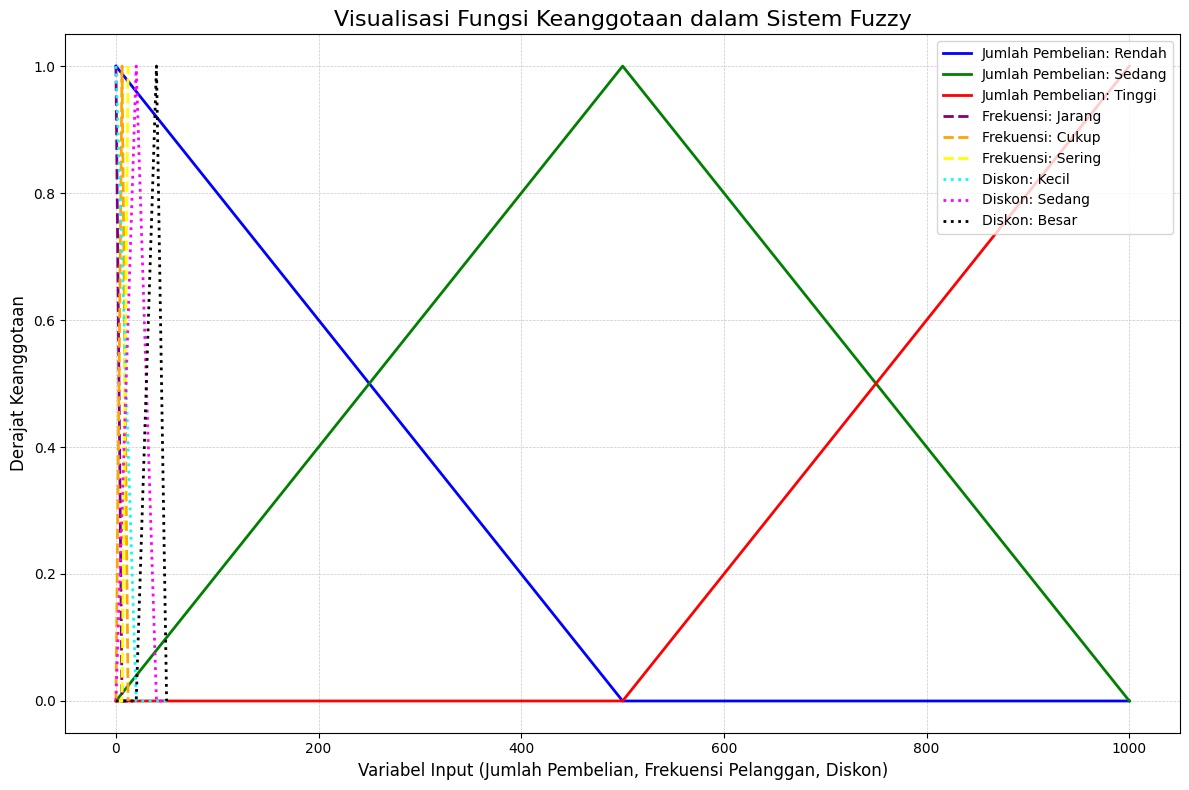

In [76]:
# Visualisasi Fungsi Keanggotaan
fig, ax = plt.subplots(figsize=(12, 8))

# Plot fungsi keanggotaan untuk jumlah pembelian
ax.plot(jumlah_pembelian, jumlah_rendah, label="Jumlah Pembelian: Rendah", color='blue', linewidth=2)
ax.plot(jumlah_pembelian, jumlah_sedang, label="Jumlah Pembelian: Sedang", color='green', linewidth=2)
ax.plot(jumlah_pembelian, jumlah_tinggi, label="Jumlah Pembelian: Tinggi", color='red', linewidth=2)

# Plot fungsi keanggotaan untuk frekuensi pelanggan
ax.plot(frekuensi_pelanggan, frekuensi_jarang, label="Frekuensi: Jarang", color='purple', linestyle='--', linewidth=2)
ax.plot(frekuensi_pelanggan, frekuensi_cukup, label="Frekuensi: Cukup", color='orange', linestyle='--', linewidth=2)
ax.plot(frekuensi_pelanggan, frekuensi_sering, label="Frekuensi: Sering", color='yellow', linestyle='--', linewidth=2)

# Plot fungsi keanggotaan untuk diskon
ax.plot(diskon, diskon_kecil, label="Diskon: Kecil", color='cyan', linestyle=':', linewidth=2)
ax.plot(diskon, diskon_sedang, label="Diskon: Sedang", color='magenta', linestyle=':', linewidth=2)
ax.plot(diskon, diskon_besar, label="Diskon: Besar", color='black', linestyle=':', linewidth=2)

# Memberikan label dan judul
ax.set_title('Visualisasi Fungsi Keanggotaan dalam Sistem Fuzzy', fontsize=16)
ax.set_xlabel('Variabel Input (Jumlah Pembelian, Frekuensi Pelanggan, Diskon)', fontsize=12)
ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

# Menampilkan grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()